# Credit Card Approval Prediction - Exploratory Data Analysis

In [1]:
# Installing necessary Libraries that are essential 
# !pip install pandas 
# !pip install numpy 
# !pip install matplotlib 
# !pip install searborn 
# !pip install math 
# !pip install warnings 
# !pip install autoviz

# Importing necessary Libraries that are essential for the EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

### Application Records Dataset EDA

In [2]:
# Loading the Application Records dataset and displaying first few records of it
data = pd.read_csv('application_record.csv')
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [3]:
# Shape of the Dataset (Rows * Columns)
data.shape

(438557, 18)

In [4]:
# Were there outliers or suspicious data?
data.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [5]:
# Total Number of Null Values in each Column
data.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [6]:
# Is there any NULL Values in the columns
data.isnull().any()

ID                     False
CODE_GENDER            False
FLAG_OWN_CAR           False
FLAG_OWN_REALTY        False
CNT_CHILDREN           False
AMT_INCOME_TOTAL       False
NAME_INCOME_TYPE       False
NAME_EDUCATION_TYPE    False
NAME_FAMILY_STATUS     False
NAME_HOUSING_TYPE      False
DAYS_BIRTH             False
DAYS_EMPLOYED          False
FLAG_MOBIL             False
FLAG_WORK_PHONE        False
FLAG_PHONE             False
FLAG_EMAIL             False
OCCUPATION_TYPE         True
CNT_FAM_MEMBERS        False
dtype: bool

In [7]:
# Head of the missing column
data.loc[:5,data.isnull().any()]

,OCCUPATION_TYPE
0,NaN
1,NaN
2,Security staff
3,Sales staff
4,Sales staff
5,Sales staff


In [8]:
# Checking for Duplicate Records
data[data.duplicated()]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS


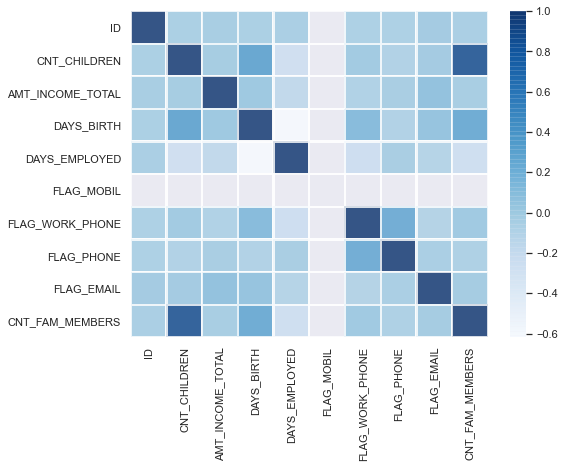

In [9]:
# Correlation Plot
sns.set()
corr = data.corr()
plt.figure(figsize = (8,6))
sns.heatmap(corr, xticklabels = corr.columns.values, 
            yticklabels = corr.columns.values,
            cmap = "Blues", linewidths = 1.25, alpha = 0.8
           )
plt.show()

In [10]:
# Evaluating Gender Proportions
eval_Gender = data["CODE_GENDER"].value_counts(normalize = True)
eval_Gender

F    0.671384
M    0.328616
Name: CODE_GENDER, dtype: float64

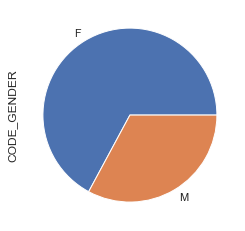

In [11]:
# Visualizing Gender Evaluation on a Pie Chart
eval_Gender.plot.pie()
plt.show()

In [12]:
# Evaluating Housing Types Proportions
eval_Housing_Type = data["NAME_HOUSING_TYPE"].value_counts(normalize = True)
eval_Housing_Type

House / apartment      0.898016
With parents           0.043499
Municipal apartment    0.032411
Rented apartment       0.013622
Office apartment       0.008943
Co-op apartment        0.003509
Name: NAME_HOUSING_TYPE, dtype: float64

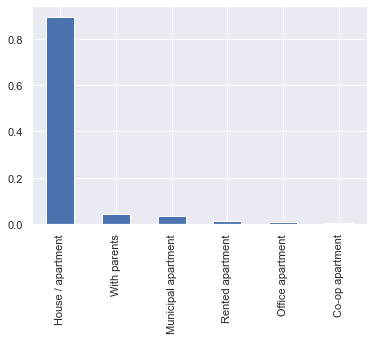

In [13]:
# Visualizing the Housing Type Evalution Metrics
eval_Housing_Type.plot.bar()
plt.show()

In [14]:
# House Ownership Proportions By Gender Type
housing_Owners = data.groupby(['CODE_GENDER','NAME_HOUSING_TYPE']).agg({'ID': 'count'})
housing_Owners

ID
CODE_GENDER NAME_HOUSING_TYPE          
F           Co-op apartment         862
            House / apartment    267607
            Municipal apartment   10019
            Office apartment       2122
            Rented apartment       3284
            With parents          10546
M           Co-op apartment         677
            House / apartment    126224
            Municipal apartment    4195
            Office apartment       1800
            Rented apartment       2690
            With parents           8531

In [15]:
# Housing Ownership Percentages
housing_Owner_Percent = housing_Owners.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
housing_Owner_Percent

ID
CODE_GENDER NAME_HOUSING_TYPE             
F           Co-op apartment       0.292759
            House / apartment    90.886768
            Municipal apartment   3.402731
            Office apartment      0.720690
            Rented apartment      1.115338
            With parents          3.581714
M           Co-op apartment       0.469757
            House / apartment    87.584393
            Municipal apartment   2.910829
            Office apartment      1.248985
            Rented apartment      1.866539
            With parents          5.919496

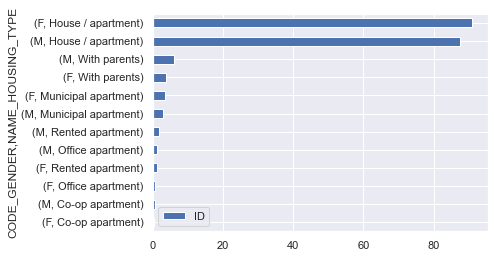

In [16]:
# Visualizing Housing Ownership Percentages By Gender on a Horizontal Bar Graph
housing_Owner_Percent.sort_values(by = 'ID').plot.barh()
plt.show()

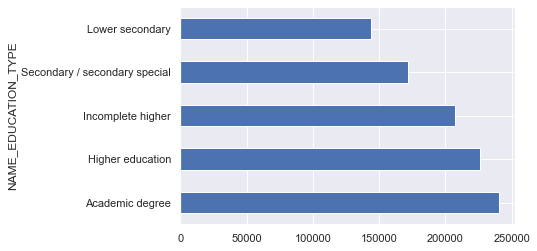

In [17]:
# Relation between Education and Income
data.groupby(["NAME_EDUCATION_TYPE"])["AMT_INCOME_TOTAL"].mean().sort_values(ascending=False).plot.barh()
plt.show()

In [18]:
# Mean & Median of the Amount Income 
print(data["AMT_INCOME_TOTAL"].mean())
print(data["AMT_INCOME_TOTAL"].median())

187524.28600950394
160780.5


### Credit Records Dataset EDA

In [19]:
# Loading the Credit Record dataset and displaying first few records of it
crData = pd.read_csv("credit_record.csv")
crData.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [20]:
# Shape of the Dataset (Rows * Columns)
crData.shape

(1048575, 3)

In [21]:
# Information of the Data Types in this Dataset
crData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
ID                1048575 non-null int64
MONTHS_BALANCE    1048575 non-null int64
STATUS            1048575 non-null object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [22]:
# Descriptive Statistics of the Numerical Variables
crData.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


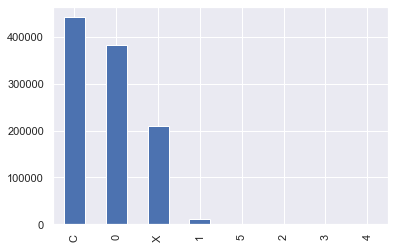

In [23]:
# Visualizing the Count of Status Types 
crData["STATUS"].value_counts().plot.bar()
plt.show()

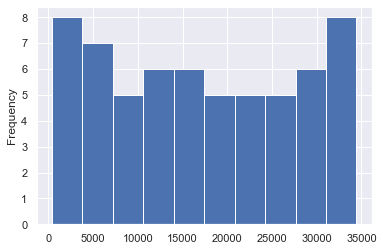

In [24]:
# Visualizing the Frequency Distribution of Months Balance 
crData["MONTHS_BALANCE"].value_counts().plot.hist()
plt.show()

In [25]:
# Credit Card Tenure of a Cardholder
crData['MONTHS_BALANCE'] = crData['MONTHS_BALANCE'].apply(lambda x : x*(-1))
card_Holder_Tenure = pd.DataFrame(crData.groupby('ID').agg({'MONTHS_BALANCE' : max}))
card_Holder_Tenure.rename(columns = {'MONTHS_BALANCE':'CUSTOMER_FOR_MONTHS'},inplace = True)
card_Holder_Tenure.head()

,CUSTOMER_FOR_MONTHS
ID,
5001711,3
5001712,18
5001713,21
5001714,14
5001715,59


### Merging Application Records & CardHolder Tenure Records Datasets

In [26]:
# To get the number of months for which the customer has had a card
customer_Data = pd.merge(data, card_Holder_Tenure,on = 'ID',how = 'inner')
customer_Data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUSTOMER_FOR_MONTHS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,15
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,14
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,26


In [27]:
# Shape of the Customer Data (Rows * Columns)
customer_Data.shape

(36457, 19)

In [28]:
# Assigning -1 Value for a Customer with Status either with C or X
crData['STATUS'][crData["STATUS"] == 'C'] = -1
crData['STATUS'][crData["STATUS"] == 'X'] = -1
crData.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,-1
1,5001711,1,0
2,5001711,2,0
3,5001711,3,0
4,5001712,0,-1


In [29]:
crData['STATUS'] = crData['STATUS'].apply(lambda x : int(x))

In [30]:
crData.sort_values(by = 'STATUS',ascending = False,inplace = True)
crData.drop_duplicates(subset = ['ID'],inplace = True)
crData.shape

(45985, 3)

In [31]:
# Assuming that a person is consider a defaulter to bank if he has a payment withstanding for more than 60 days. 
# So all the customers having STATUS >= 2 will be considered as defaulters or bad customers.
crData['target'] = crData["STATUS"].apply(lambda x : 0 if x>=2 else 1)
crData.drop(['STATUS','MONTHS_BALANCE'],axis = 1,inplace = True)
crData.head()

,ID,target
372050,5042064,0
307952,5029028,0
723708,5097065,0
942335,5135344,0
832456,5117313,0


In [32]:
# Count of Target Values
crData["target"].value_counts()

1    45318
0      667
Name: target, dtype: int64

### Merging Customer Data and Credit Records Datasets

In [33]:
customer_Data = pd.merge(customer_Data, crData, on = "ID", how = "inner")
customer_Data.shape

(36457, 20)

In [34]:
# Displaying fiest few records of the Customer Data
customer_Data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUSTOMER_FOR_MONTHS,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,15,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,14,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,26,1


In [35]:
# Display the Names of all the Columns
customer_Data.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'CUSTOMER_FOR_MONTHS', 'target'],
      dtype='object')

In [36]:
# Drop duplicated values if any
customer_Data.drop_duplicates(subset = ['CODE_GENDER', 
                                    'FLAG_OWN_CAR', 
                                    'FLAG_OWN_REALTY', 
                                    'CNT_CHILDREN',
                                    'AMT_INCOME_TOTAL', 
                                    'NAME_INCOME_TYPE', 
                                    'NAME_EDUCATION_TYPE',
                                    'NAME_FAMILY_STATUS', 
                                    'NAME_HOUSING_TYPE', 
                                    'DAYS_BIRTH', 
                                    'DAYS_EMPLOYED', 
                                    'FLAG_MOBIL', 
                                    'FLAG_WORK_PHONE', 
                                    'FLAG_PHONE', 
                                    'FLAG_EMAIL', 
                                    'OCCUPATION_TYPE', 
                                    'CNT_FAM_MEMBERS', 
                                    'CUSTOMER_FOR_MONTHS',
                                    'target'], inplace = True)
customer_Data.shape

(32177, 20)

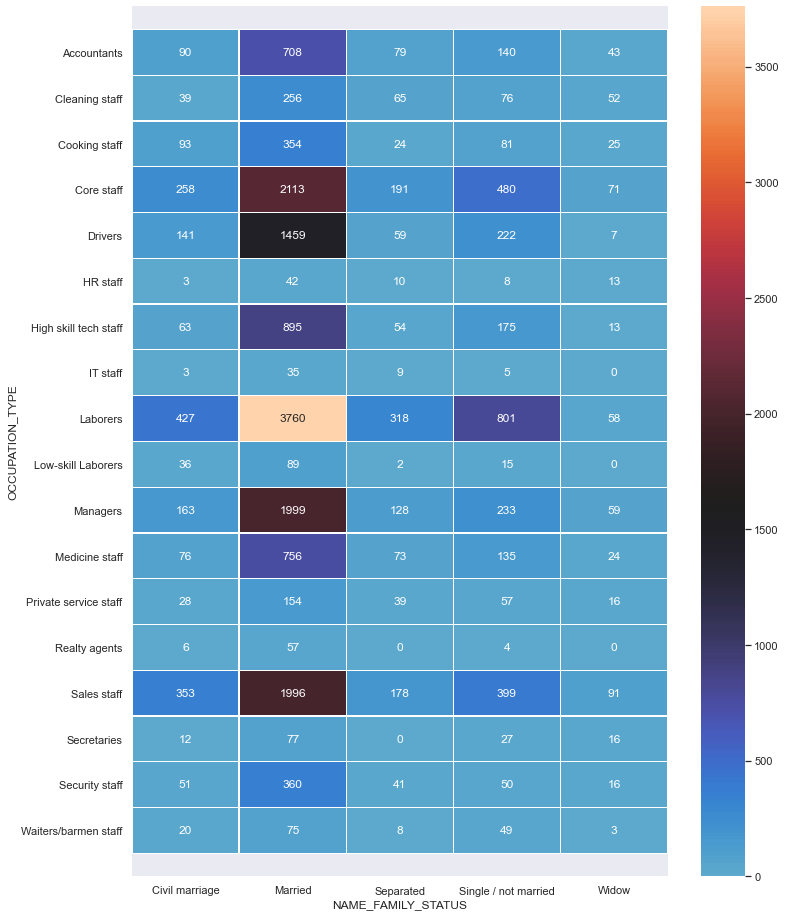

In [37]:
# Pivot Table to display the Heatmap between the Occupation Type and Family Status Types
pivot_Table = pd.pivot_table(data = customer_Data, index = ['OCCUPATION_TYPE'], columns = ['NAME_FAMILY_STATUS'], values = 'target', aggfunc = sum,  fill_value = 0)
plt.figure(figsize=[12, 16])
hm = sns.heatmap(data = pivot_Table, annot = True, fmt='.0f', linewidths=.2, center = 1600)
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

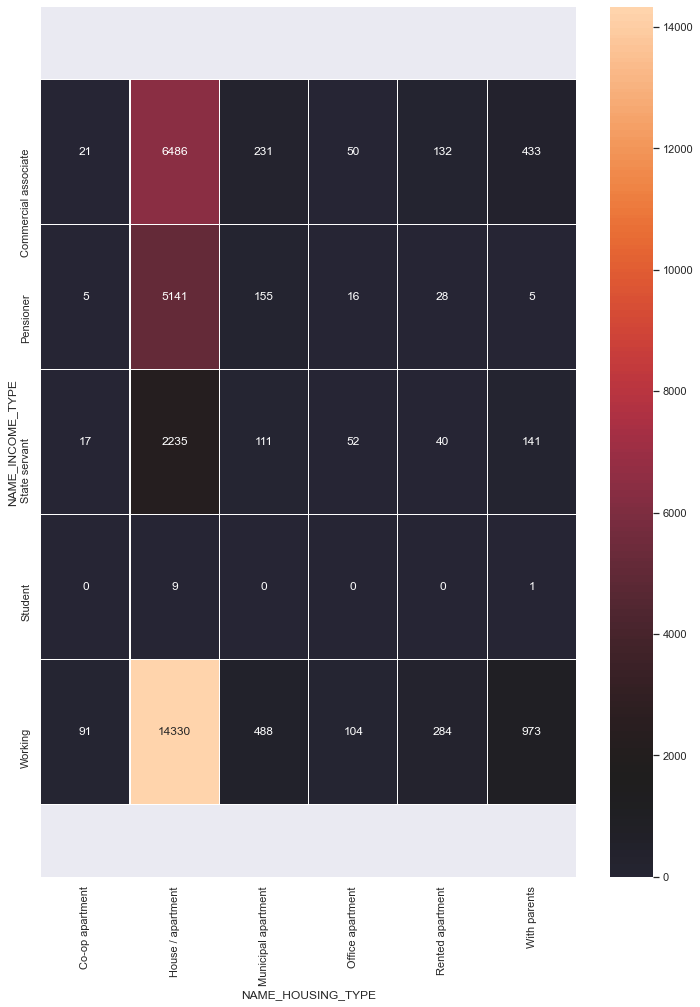

In [38]:
# Pivot Table to display the Heatmap between the Incone Type and Hosuing Types
pivot_Table_1 = pd.pivot_table(data = customer_Data, index = ['NAME_INCOME_TYPE'], columns = ['NAME_HOUSING_TYPE'], values = 'target', aggfunc = sum,  fill_value = 0)
plt.figure(figsize=[12,16])
hm = sns.heatmap(data = pivot_Table_1, annot = True, fmt='.0f', linewidths=.2, center = 1600)
bottom, top = hm.get_ylim()
hm.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [39]:
# Information of the Customer Data's Data Types
customer_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32177 entries, 0 to 36456
Data columns (total 20 columns):
ID                     32177 non-null int64
CODE_GENDER            32177 non-null object
FLAG_OWN_CAR           32177 non-null object
FLAG_OWN_REALTY        32177 non-null object
CNT_CHILDREN           32177 non-null int64
AMT_INCOME_TOTAL       32177 non-null float64
NAME_INCOME_TYPE       32177 non-null object
NAME_EDUCATION_TYPE    32177 non-null object
NAME_FAMILY_STATUS     32177 non-null object
NAME_HOUSING_TYPE      32177 non-null object
DAYS_BIRTH             32177 non-null int64
DAYS_EMPLOYED          32177 non-null int64
FLAG_MOBIL             32177 non-null int64
FLAG_WORK_PHONE        32177 non-null int64
FLAG_PHONE             32177 non-null int64
FLAG_EMAIL             32177 non-null int64
OCCUPATION_TYPE        22197 non-null object
CNT_FAM_MEMBERS        32177 non-null float64
CUSTOMER_FOR_MONTHS    32177 non-null int64
target                 32177 non-null int64

In [40]:
# Total Null Values in the Customer Data
customer_Data.isnull().sum()

ID                        0
CODE_GENDER               0
FLAG_OWN_CAR              0
FLAG_OWN_REALTY           0
CNT_CHILDREN              0
AMT_INCOME_TOTAL          0
NAME_INCOME_TYPE          0
NAME_EDUCATION_TYPE       0
NAME_FAMILY_STATUS        0
NAME_HOUSING_TYPE         0
DAYS_BIRTH                0
DAYS_EMPLOYED             0
FLAG_MOBIL                0
FLAG_WORK_PHONE           0
FLAG_PHONE                0
FLAG_EMAIL                0
OCCUPATION_TYPE        9980
CNT_FAM_MEMBERS           0
CUSTOMER_FOR_MONTHS       0
target                    0
dtype: int64

In [41]:
# Converting Binary Categorical Columns to have Integer value
customer_Data['CODE_GENDER'] = customer_Data["CODE_GENDER"].apply(lambda x : 0 if x == 'M' else 1)
customer_Data['FLAG_OWN_CAR'] = customer_Data["FLAG_OWN_CAR"].apply(lambda x : 0 if x == 'N' else 1)
customer_Data['FLAG_OWN_REALTY'] = customer_Data["FLAG_OWN_REALTY"].apply(lambda x : 0 if x == 'N' else 1)
customer_Data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUSTOMER_FOR_MONTHS,target
0,5008804,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,15,1
1,5008805,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,14,1
2,5008806,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,29,1
3,5008808,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,4,1
4,5008809,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,26,1


In [42]:
# Descriptive Statistics of the Customer Data
customer_Data.describe()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CUSTOMER_FOR_MONTHS,target
count,3.217700e+04,32177.000000,32177.000000,32177.000000,32177.000000,3.217700e+04,32177.000000,32177.000000,32177.0,32177.000000,32177.000000,32177.000000,32177.000000,32177.000000,32177.000000
mean,5.078181e+06,0.669267,0.378842,0.671194,0.431395,1.858457e+05,-15976.384871,59795.907387,1.0,0.225285,0.295180,0.089971,2.199521,26.070268,0.981415
std,4.181678e+04,0.470484,0.485106,0.469787,0.745757,1.007217e+05,4214.213798,138116.549593,0.0,0.417776,0.456131,0.286145,0.914533,16.465296,0.135055
min,5.008804e+06,0.000000,0.000000,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,5.041913e+06,0.000000,0.000000,0.000000,0.000000,1.215000e+05,-19457.000000,-3141.000000,1.0,0.000000,0.000000,0.000000,2.000000,12.000000,1.000000
50%,5.074710e+06,1.000000,0.000000,1.000000,0.000000,1.575000e+05,-15565.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,24.000000,1.000000
75%,5.114631e+06,1.000000,1.000000,1.000000,1.000000,2.250000e+05,-12454.000000,-401.000000,1.0,0.000000,1.000000,0.000000,3.000000,39.000000,1.000000
max,5.150487e+06,1.000000,1.000000,1.000000,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,60.000000,1.000000


In [43]:
# Count of Flag Mobil Types
customer_Data["FLAG_MOBIL"].value_counts()

1    32177
Name: FLAG_MOBIL, dtype: int64

In [44]:
# Dropping of the FLAG_MOBIL Column
# No variation and No Value
customer_Data.drop('FLAG_MOBIL', axis = 1, inplace = True)
customer_Data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUSTOMER_FOR_MONTHS,target
0,5008804,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0,15,1
1,5008805,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2.0,14,1
2,5008806,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,29,1
3,5008808,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,4,1
4,5008809,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,26,1


In [45]:
# CNT_FAM_MEMBERS can not be float. Converting this column to INT type
customer_Data['CNT_FAM_MEMBERS'] = customer_Data['CNT_FAM_MEMBERS'].astype('int')
customer_Data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUSTOMER_FOR_MONTHS,target
0,5008804,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2,15,1
1,5008805,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,NaN,2,14,1
2,5008806,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2,29,1
3,5008808,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1,4,1
4,5008809,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1,26,1


In [46]:
# Defining a Box Plot Function
def box_plot(df,col) :
    sns.boxplot(data = df, y = col)
    plt.show()

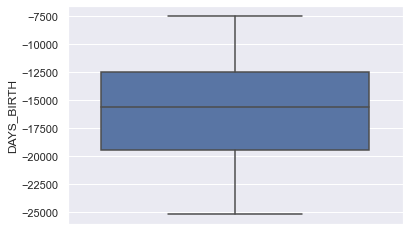

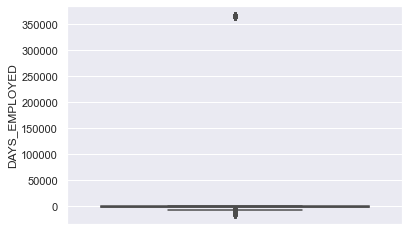

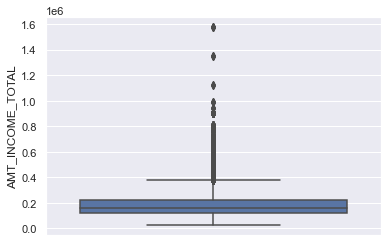

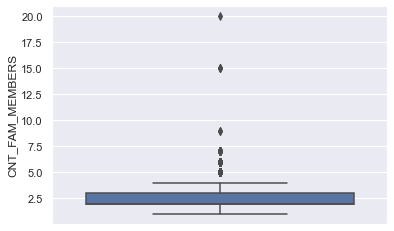

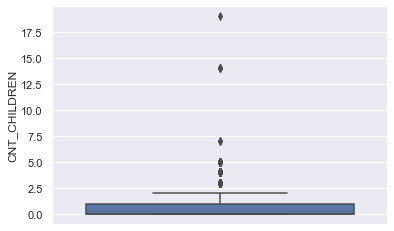

In [47]:
boxplt_Col = ["DAYS_BIRTH","DAYS_EMPLOYED","AMT_INCOME_TOTAL","CNT_FAM_MEMBERS","CNT_CHILDREN"]
for col in boxplt_Col :
    box_plot(customer_Data,col)

In [48]:
# Checking Outliers for DAYS_EMPLOYED column
customer_Data[customer_Data['DAYS_EMPLOYED'] > 0]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUSTOMER_FOR_MONTHS,target
7,5008812,1,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,NaN,1,20,1
8,5008813,1,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,NaN,1,16,1
9,5008814,1,0,1,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,NaN,1,17,1
69,5008884,1,0,1,0,315000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-20186,365243,0,0,0,NaN,1,40,1
150,5008974,1,0,1,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22319,365243,0,0,0,NaN,2,49,1
152,5008976,1,0,1,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22319,365243,0,0,0,NaN,2,1,1
153,5008977,1,0,1,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22319,365243,0,0,0,NaN,2,23,1
154,5008978,1,0,1,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22319,365243,0,0,0,NaN,2,38,1
155,5008979,1,0,1,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22319,365243,0,0,0,NaN,2,37,1
156,5008980,1,0,1,0,112500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22319,365243,0,0,0,NaN,2,58,1


In [49]:
# Validity of Pensioners Income Type Data
customer_Data[(customer_Data['DAYS_EMPLOYED'] > 0) & (customer_Data["NAME_INCOME_TYPE"] == 'Pensioner')].shape

(5461, 19)

In [50]:
# Convert the Integer columns to Positive Integers
def convert_to_positive(df,column) :
    df[column] = df[column].apply(lambda x : x*-1)
    return df

In [51]:
# Converting Integers to Positive Integers for Continuous Variables
conti_Vars = ['DAYS_BIRTH','DAYS_EMPLOYED']
for c in conti_Vars :
    customer_Data = convert_to_positive(customer_Data,c)
customer_Data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUSTOMER_FOR_MONTHS,target
0,5008804,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,0,0,NaN,2,15,1
1,5008805,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005,4542,1,0,0,NaN,2,14,1
2,5008806,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,21474,1134,0,0,0,Security staff,2,29,1
3,5008808,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,0,1,1,Sales staff,1,4,1
4,5008809,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110,3051,0,1,1,Sales staff,1,26,1


In [52]:
# Converting DAYS to YEARS
customer_Data['EMP_YEARS'] = customer_Data["DAYS_EMPLOYED"]/365
customer_Data['AGE'] = customer_Data["DAYS_BIRTH"]/365
customer_Data.drop(["DAYS_BIRTH","DAYS_EMPLOYED"],axis = 1,inplace = True)
customer_Data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CUSTOMER_FOR_MONTHS,target,EMP_YEARS,AGE
0,5008804,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,NaN,2,15,1,12.443836,32.890411
1,5008805,0,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,NaN,2,14,1,12.443836,32.890411
2,5008806,0,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2,29,1,3.106849,58.832877
3,5008808,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1,4,1,8.358904,52.356164
4,5008809,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0,1,1,Sales staff,1,26,1,8.358904,52.356164


In [53]:
# Replacing all the EMP_YEARS for all the Pensioners with -1
customer_Data['EMP_YEARS'] = customer_Data['EMP_YEARS'].apply(lambda x : -1 if x<0 else x)

In [54]:
def bad_customer_props(col) :
    bad_prop_cnt = customer_Data.groupby([col,'target']).agg({'ID': 'count'})
    bad_prop_percent = bad_prop_cnt.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
    return bad_prop_percent

In [55]:
# Proportion of bad customers for people who own a car is < those who don't own a car
bad_customer_props('FLAG_OWN_CAR')

ID
FLAG_OWN_CAR target           
0            0        1.926252
             1       98.073748
1            0        1.747334
             1       98.252666

In [56]:
# People living on rent don't have the highest proportion of bad customers. 
# People having 'Office apartment' have the highest proportion of bad customers
bad_customer_props('NAME_HOUSING_TYPE')

ID
NAME_HOUSING_TYPE   target           
Co-op apartment     0        2.189781
                    1       97.810219
House / apartment   0        1.817359
                    1       98.182641
Municipal apartment 0        2.955665
                    1       97.044335
Office apartment    0        3.896104
                    1       96.103896
Rented apartment    0        1.626016
                    1       98.373984
With parents        0        1.646612
                    1       98.353388

In [57]:
# Single customers have a higher proportion of bad customers as compared to married customers
bad_customer_props('NAME_FAMILY_STATUS')

ID
NAME_FAMILY_STATUS   target           
Civil marriage       0        1.717557
                     1       98.282443
Married              0        1.720625
                     1       98.279375
Separated            0        1.615509
                     1       98.384491
Single / not married 0        2.327221
                     1       97.672779
Widow                0        3.232917
                     1       96.767083

In [58]:
customer_Data['OCCUPATION_TYPE'] = customer_Data['OCCUPATION_TYPE'].apply(lambda x : 'UNEMPLOYED' if pd.isnull(x) else x)
customer_Data['OCCUPATION_TYPE'].value_counts()

UNEMPLOYED               9980
Laborers                 5460
Core staff               3185
Sales staff              3062
Managers                 2629
Drivers                  1931
High skill tech staff    1229
Accountants              1082
Medicine staff           1074
Cooking staff             586
Security staff            530
Cleaning staff            493
Private service staff     296
Waiters/barmen staff      157
Low-skill Laborers        150
Secretaries               134
HR staff                   77
Realty agents              67
IT staff                   55
Name: OCCUPATION_TYPE, dtype: int64

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.
Shape of your Data Set: (438557, 18)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  4
    Number of String-Categorical Columns =  5
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  3
    Number of Numeric-Boolean Columns =  3
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  

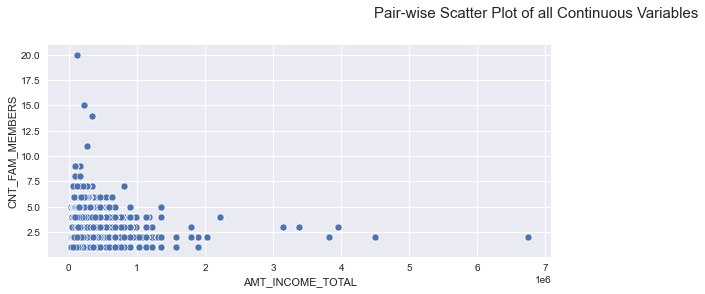

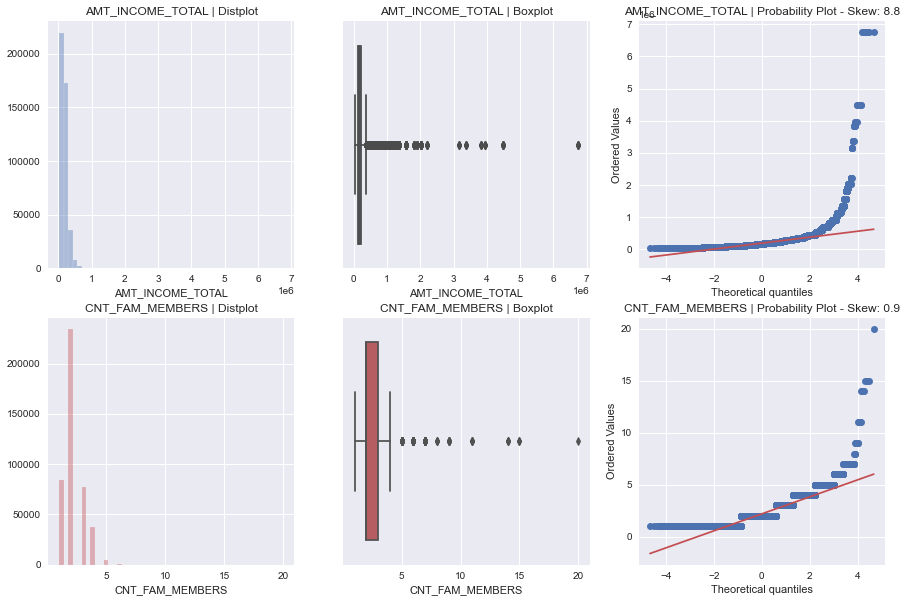

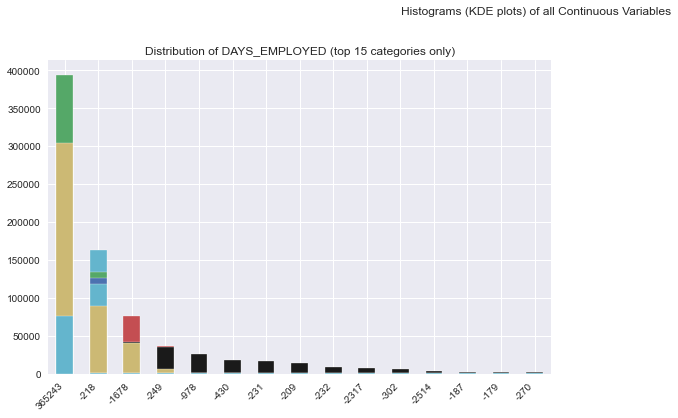

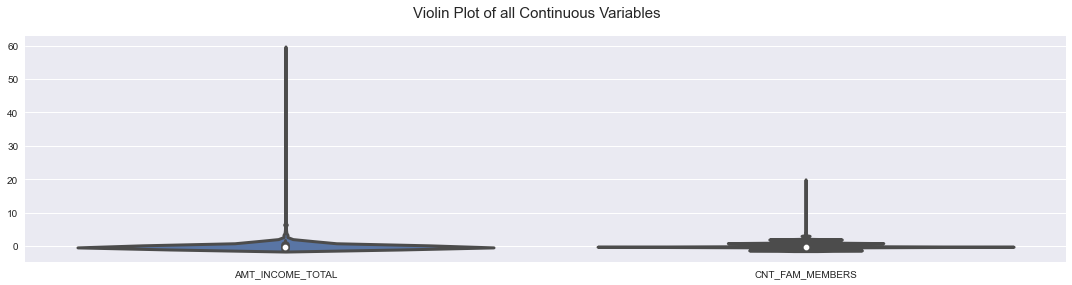

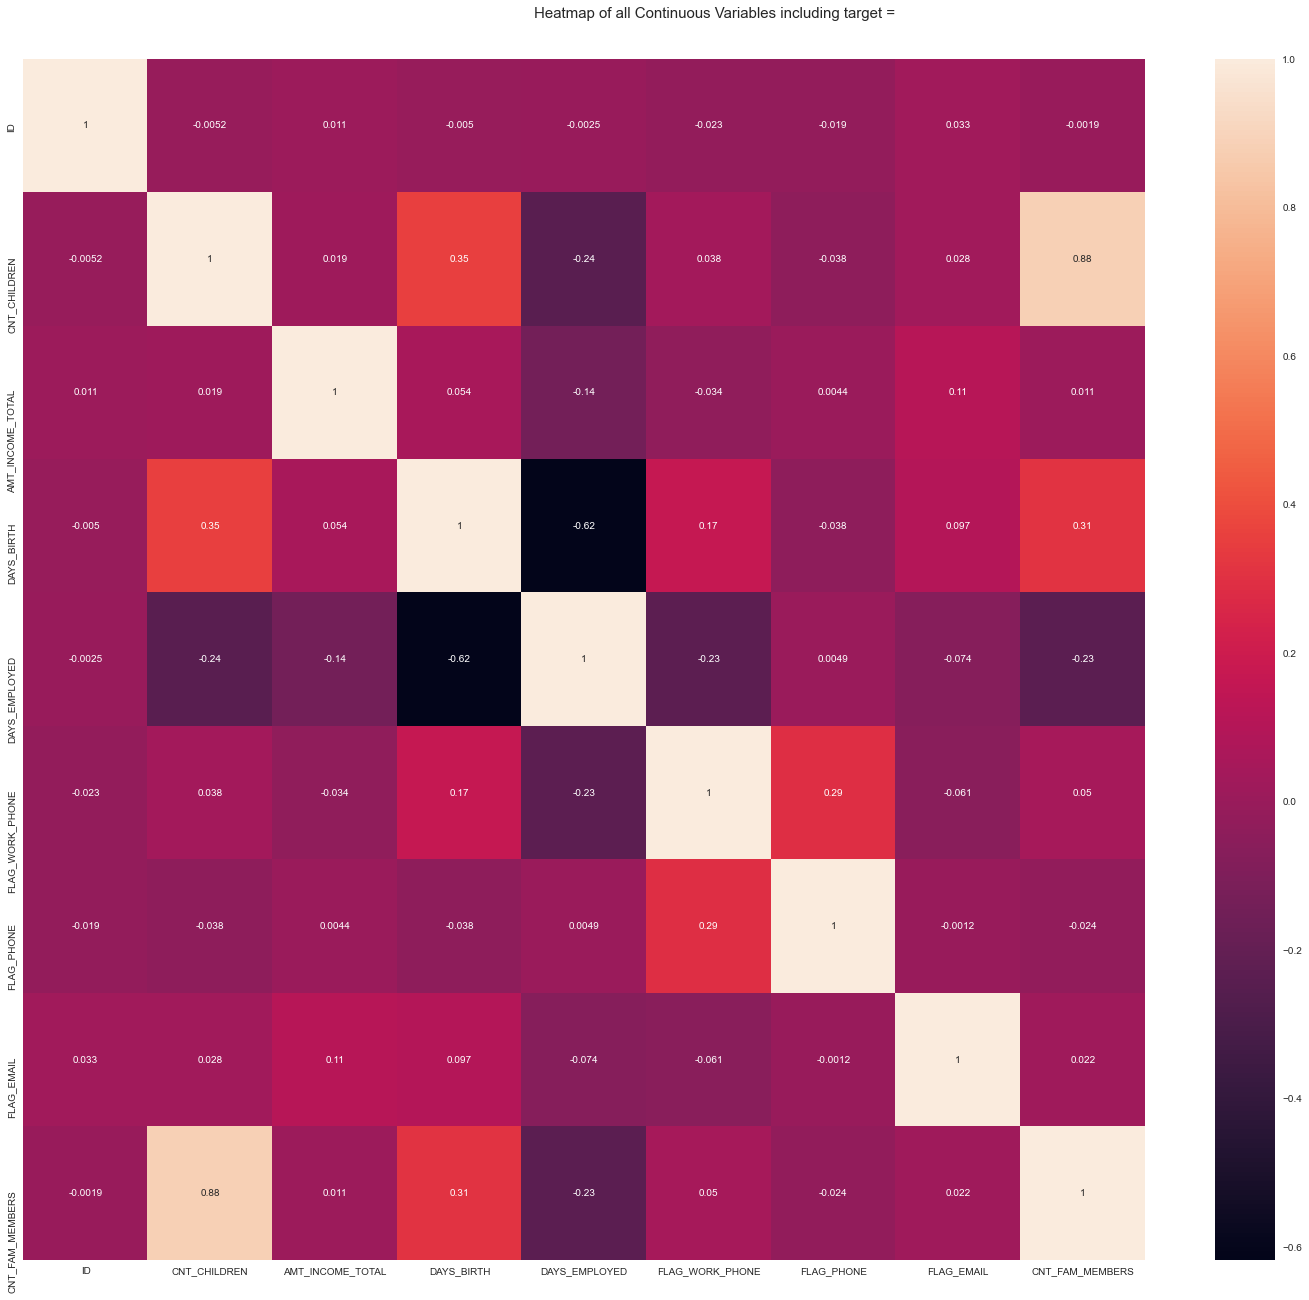

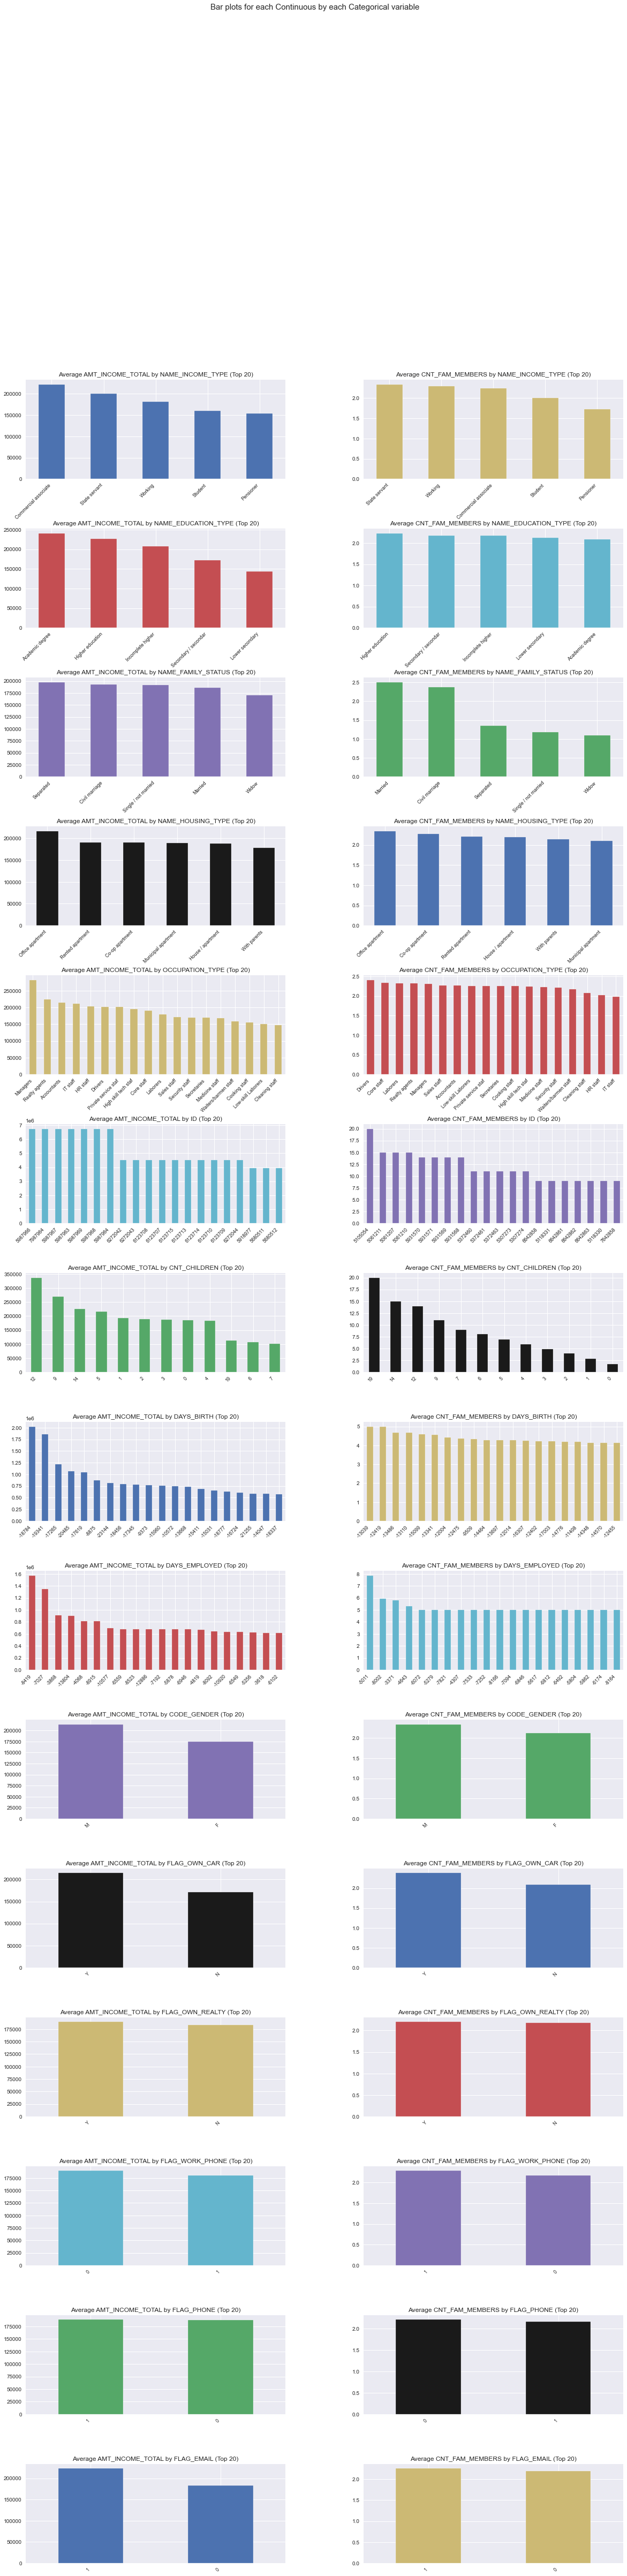

Time to run AutoViz (in seconds) = 28.468

 ###################### VISUALIZATION Completed ########################


In [59]:
# Used this library to display Automatic Visualizations on the Application Records Dataset
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

filename = 'application_record.csv'
sep = ','
dft = AV.AutoViz(filename, 
                 sep, 
                 depVar='', 
                 dfte=None,
                 header=0, 
                 verbose=0, 
                 lowess=False, 
                 chart_format='svg', 
                 max_rows_analyzed=5000000, 
                 max_cols_analyzed=50)

### Thank You!